In [1]:
import os
import csv
import numpy as np
import pandas as pd

In [2]:
files = [
    'credco_webconf_study_1_study_1_project_1_2018_02_21t22_43_18_00_00_anon_nolink.csv',
    'credco_webconf_study_2_study_2_project_1_2018_02_21t22_44_07_00_00_anon_nolink.csv',
    'credco_webconf_study_3_study_3_project_1_2018_02_21t22_44_40_00_00_anon_nolink.csv'
]

In [3]:
file_paths = [os.path.join('credibilitycoalition-webconf-2018', 'data', file) for file in files]
print(file_paths)

['credibilitycoalition-webconf-2018/data/credco_webconf_study_1_study_1_project_1_2018_02_21t22_43_18_00_00_anon_nolink.csv', 'credibilitycoalition-webconf-2018/data/credco_webconf_study_2_study_2_project_1_2018_02_21t22_44_07_00_00_anon_nolink.csv', 'credibilitycoalition-webconf-2018/data/credco_webconf_study_3_study_3_project_1_2018_02_21t22_44_40_00_00_anon_nolink.csv']


In [4]:
data = []
labels = []
for file_path in file_paths:
    with open(file_path) as csvfile:
        csv_reader = csv.reader(csvfile)
        for idx, row in enumerate(csv_reader):
            if idx == 0:
                labels.append(row)
            if idx > 0:
                data.append(row)

In [5]:
print(np.shape(data))
print([np.shape(sample) for sample in data])

(150,)
[(140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (140,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (137,), (145,), (145,), (145,), (145,), (145,), (145,), (145,), (145,), (145,), (145,), (145,), (145,), (145,), (145,), (145,), (145,), (145,), (145,), (145,), (145,), (145,), (145,), (145,), (145,), 

In [6]:
print([np.shape(label) for label in labels])

[(140,), (137,), (145,)]


In [7]:
#print([sample for sample in labels])
print(labels[0])
print(labels[1])
print(labels[2])

['project_id', 'report_id', 'report_title', 'report_date', 'media_content', 'media_url', 'report_status', 'time_delta_to_first_status', 'time_delta_to_last_status', 'time_original_media_publishing', 'type', 'contributing_users', 'tags', 'notes_count', 'notes_ugc_count', 'tasks_count', 'tasks_resolved_count', 'task_question_1', 'task_user_1', 'task_date_1', 'task_answer_1', 'task_note_1', 'task_question_2', 'task_user_2', 'task_date_2', 'task_answer_2', 'task_note_2', 'task_question_3', 'task_user_3', 'task_date_3', 'task_answer_3', 'task_note_3', 'task_question_4', 'task_user_4', 'task_date_4', 'task_answer_4', 'task_note_4', 'task_question_5', 'task_user_5', 'task_date_5', 'task_answer_5', 'task_note_5', 'task_question_6', 'task_user_6', 'task_date_6', 'task_answer_6', 'task_note_6', 'task_question_7', 'task_user_7', 'task_date_7', 'task_answer_7', 'task_note_7', 'task_question_8', 'task_user_8', 'task_date_8', 'task_answer_8', 'task_note_8', 'task_question_9', 'task_user_9', 'task_da

In [8]:
label = labels[np.argmax([len(label) for label in labels])]

In [16]:
import re

r = re.compile("task_answer_[0-9]+")
task_answer_labels = list(filter(r.match, label))

# check the first task_answer set
idx = label.index(task_answer_labels[0])
task_answer_0 = [col[idx] for col in data]
possible_answers = set(task_answer_0)

print(possible_answers)

{'', 'Medium credibility', 'Somewhat high credibility', 'Very high credibility', 'Somewhat low credibility', 'Very low credibility'}


: 1
Medium credibility: 29
Somewhat high credibility: 22
Very high credibility: 31
Somewhat low credibility: 39
Very low credibility: 28


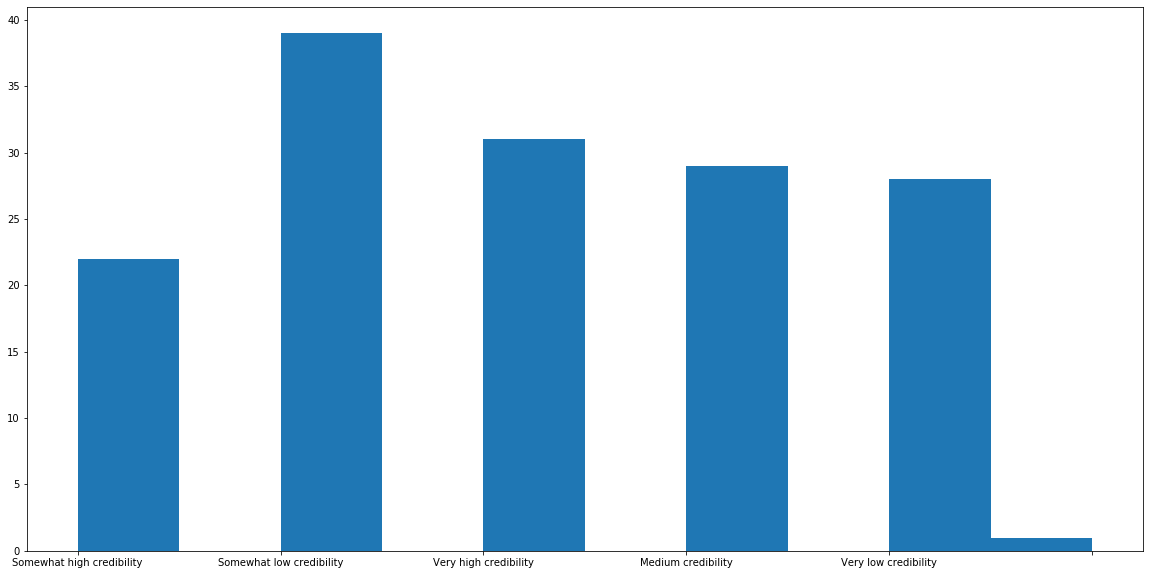

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.hist(task_answer_0)

# print counts of possible answers
[print('{}: {}'.format(answer_option, task_answer_0.count(answer_option))) for answer_option in possible_answers];

In [11]:
df = pd.DataFrame(data, columns=label)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

,project_id,report_id,report_title,report_date,media_content,media_url,report_status,time_delta_to_first_status,time_delta_to_last_status,time_original_media_publishing,type,contributing_users,tags,notes_count,notes_ugc_count,tasks_count,tasks_resolved_count,task_question_1,task_user_1,task_date_1,task_answer_1,task_note_1,task_question_2,task_user_2,task_date_2,task_answer_2,task_note_2,task_question_3,task_user_3,task_date_3,task_answer_3,task_note_3,task_question_4,task_user_4,task_date_4,task_answer_4,task_note_4,task_question_5,task_user_5,task_date_5,task_answer_5,task_note_5,task_question_6,task_user_6,task_date_6,task_answer_6,task_note_6,task_question_7,task_user_7,task_date_7,task_answer_7,task_note_7,task_question_8,task_user_8,task_date_8,task_answer_8,task_note_8,task_question_9,task_user_9,task_date_9,task_answer_9,task_note_9,task_question_10,task_user_10,task_date_10,task_answer_10,task_note_10,task_question_11,task_user_11,task_date_11,task_answer_11,task_note_11,task_question_12,task_user_12,task_date_12,task_answer_12,task_note_12,task_question_13,task_user_13,task_date_13,task_answer_13,task_note_13,task_question_14,task_user_14,task_date_14,task_answer_14,task_note_14,task_question_15,task_user_15,task_date_15,task_answer_15,task_note_15,task_question_16,task_user_16,task_date_16,task_answer_16,task_note_16,task_question_17,task_user_17,task_date_17,task_answer_17,task_note_17,task_question_18,task_user_18,task_date_18,task_answer_18,task_note_18,task_question_19,task_user_19,task_date_19,task_answer_19,task_note_19,task_question_20,task_user_20,task_date_20,task_answer_20,task_note_20,task_question_21,task_user_21,task_date_21,task_answer_21,task_note_21,task_question_22,task_user_22,task_date_22,task_answer_22,task_note_22,task_question_23,task_user_23,task_date_23,task_answer_23,task_note_23,task_question_24,task_user_24,task_date_24,task_answer_24,task_note_24,note_date_1,note_user_1,note_content_1,task_question_25,task_user_25,task_date_25,task_answer_25,task_note_25
0,1083,7772,"Floods in India, Bangladesh and Nepal kill 1,2...",2017-12-07 01:10:22 UTC,"At least 1,200 people have been killed and mil...",https://www.independent.co.uk/news/world/asia/...,complete,663353,711688,2017-08-29 17:32:14 +0000,page,2,,49,false,24,22,Rate your impression of the credibility of thi...,Check-2018-05,2017-12-14 16:52:16 UTC,Somewhat high credibility,,Has the text of this article appeared in exact...,Check-2018-05,2017-12-14 16:54:48 UTC,A) Most likely original,,"If you answered B, C, D, above, was attributio...",,,,,Has the central claim in this article been fac...,Check-2018-05,2017-12-14 16:55:30 UTC,B) Most likely not fact-checked by an approved...,,Is Source 1...,Check-2018-05,2017-12-14 17:00:59 UTC,An organization,The Straits Times,Is a link for Source 1 provided in the article...,Check-2018-05,2017-12-14 17:01:10 UTC,true,http://www.straitstimes.com/asia/south-asia/de...,"If you can find it, paste the impact factor of...",Check-2018-05,2017-12-14 17:01:17 UTC,could not locate,,This article properly characterizes the method...,Check-2018-05,2017-12-14 17:04:16 UTC,Neutral,"Most information is correct, but there is no m...",Is Source 2...,Check-2018-05,2017-12-14 17:05:57 UTC,An organization,The United Nations,Is a link for Source 2 provided in the article...,Check-2018-05,2017-12-14 17:08:23 UTC,false,Perhaps this? http://www.un.org/apps/news/stor...,"If you can find it, paste the impact factor of...",Check-2018-05,2017-12-14 17:09:39 UTC,could not locate,,This article properly characterizes the method...,Check-2018-05,2017-12-14 17:12:29 UTC,Somewhat agree,"The article says, ""In Nepal, 150 people have b...",Is Source 3...,Check-2018-05,2017-12-14 17:13:52 UTC,An organization,Red Cross,Is a link for Source 3 provided in the article...,Check-2018-05,2017-12-14 17:13:56 UTC,true,http://blogs.redcross.org.uk/appeals/2017/08/b...,"If you can find it, paste the impact factor of...",,,,,This article properly chara